In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.io import loadmat
import xlsxwriter 
%matplotlib inline

In [2]:
def NGD(x,alpha,beta,K,g,phi):
    y=np.zeros(len(x))
    z=np.zeros(len(x))
    for j in range(len(x)-1):
        dy=dt*(-alpha*y[j]+K*(x[j]-phi*z[j]))
        dz=dt*(-beta*z[j]+g*y[j])
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
    return y,z

In [3]:
# gain control 
def NGD_GC(x,alpha,beta,K,g,phi):
    y=np.zeros(len(x))
    z=np.zeros(len(x))
    v=np.zeros(len(x))
    GC=np.zeros(len(x))
    for j in range(len(x)-1):
        dy=dt*(-alpha*y[j]+K*GC[j]*(x[j]-phi*z[j]))
        dz=dt*(-beta*z[j]+g*y[j])
#         dv=dt*(-0.5*v[j]+5*y[j])
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
#         v[j+1]=v[j]+dv
        GC[j+1]=1/(1+10*z[j+1]**4)
    return y,z,v,GC

(-0.9989000000000001, 20.998900000000003)

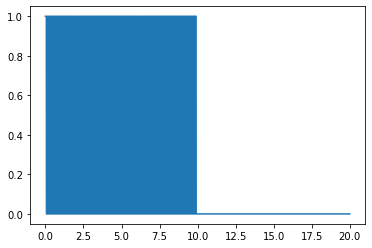

In [4]:
# generate flicker
Tot=20
flicker_time=10
dt=0.001
pw=0.06
T=np.arange(dt,Tot,dt)
x=np.zeros(len(T))
for num_pulse in range(int(np.floor(flicker_time/pw/2))):
    index_pulse=num_pulse*int(pw*2/dt)
    for j in range(int(pw/dt)):
        x[index_pulse+j]=1
x_set=[x]
    
plt.plot(T,x)
plt.xlim()

In [5]:
y_set=[[] for i in range(len(x_set))]
z_set=[[] for i in range(len(x_set))]
v_set=[[] for i in range(len(x_set))]
GC_set=[[] for i in range(len(x_set))]
y_set2=[[] for i in range(len(x_set))]
z_set2=[[] for i in range(len(x_set))]
alpha,beta,K,g=6,1.6,22,10
for i in range(len(x_set)):
    y_set[i],z_set[i],v_set[i],GC_set[i]=NGD_GC(x_set[i],alpha,beta,K,g,1)
    y_set2[i],z_set2[i]=NGD(x_set[i],alpha,beta,K,g,1)

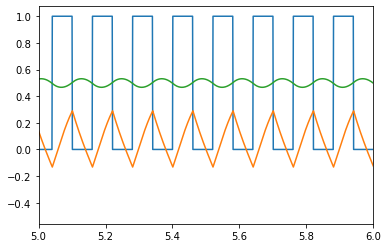

(5.0, 6.0)

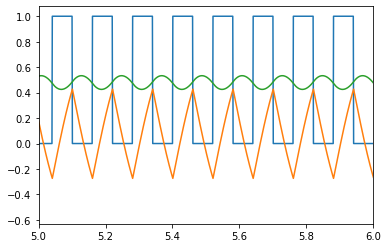

In [6]:
plt.plot(T,x_set[0])
plt.plot(T,y_set[0])
plt.plot(T,z_set[0])
plt.xlim(5,6)
plt.show()
plt.plot(T,x_set[0])
plt.plot(T,y_set2[0])
plt.plot(T,z_set2[0])
plt.xlim(5,6)


(5.0, 6.0)

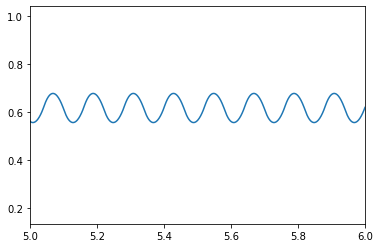

In [7]:
plt.plot(T,1/(1+10*z_set[0]**4))
plt.xlim(5,6)

(-0.9989000000000001, 20.998900000000003)

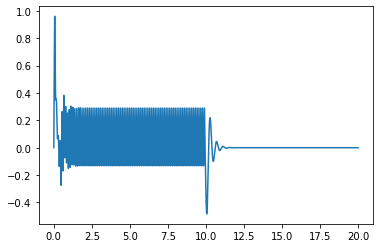

In [8]:
# plt.plot(T,x_set[0])
# plt.plot(T,z_set[0])
plt.plot(T,y_set[0])
plt.xlim()

(5.0, 6.0)

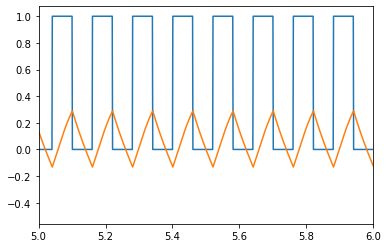

In [9]:
plt.plot(T,x_set[0])
plt.plot(T,y_set[0])
plt.xlim(5,6)

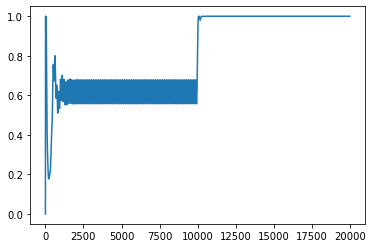

In [10]:
plt.plot(GC_set[0])